In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Data Analysis

In [5]:
df = pd.read_csv("dataset.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.shape

(303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  target    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 30.9 KB


In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,-0.430696


### 2. Data Visualization

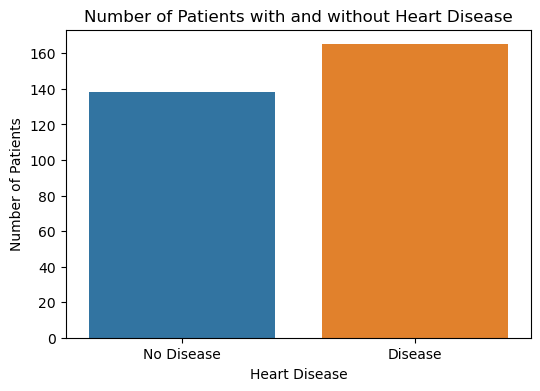

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='target')
plt.xlabel('Heart Disease')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with and without Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

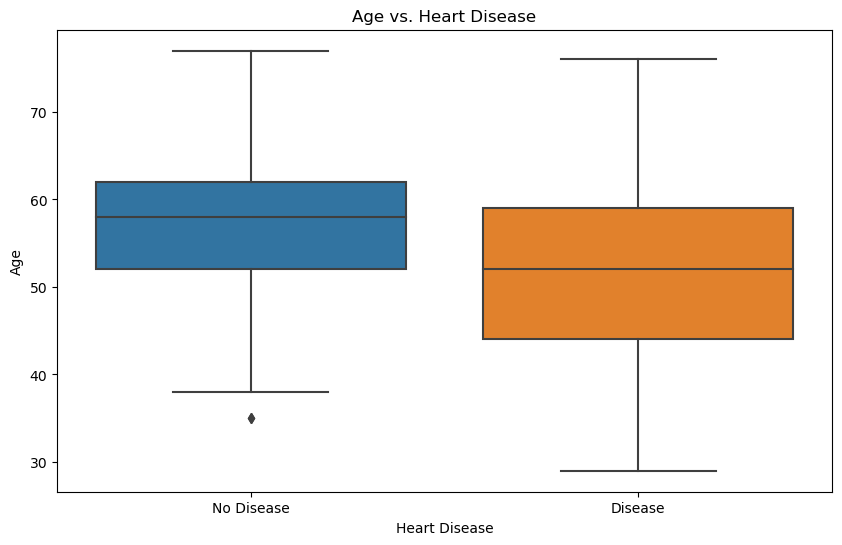

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='target', y='age')
plt.xlabel('Heart Disease')
plt.ylabel('Age')
plt.title('Age vs. Heart Disease')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.show()

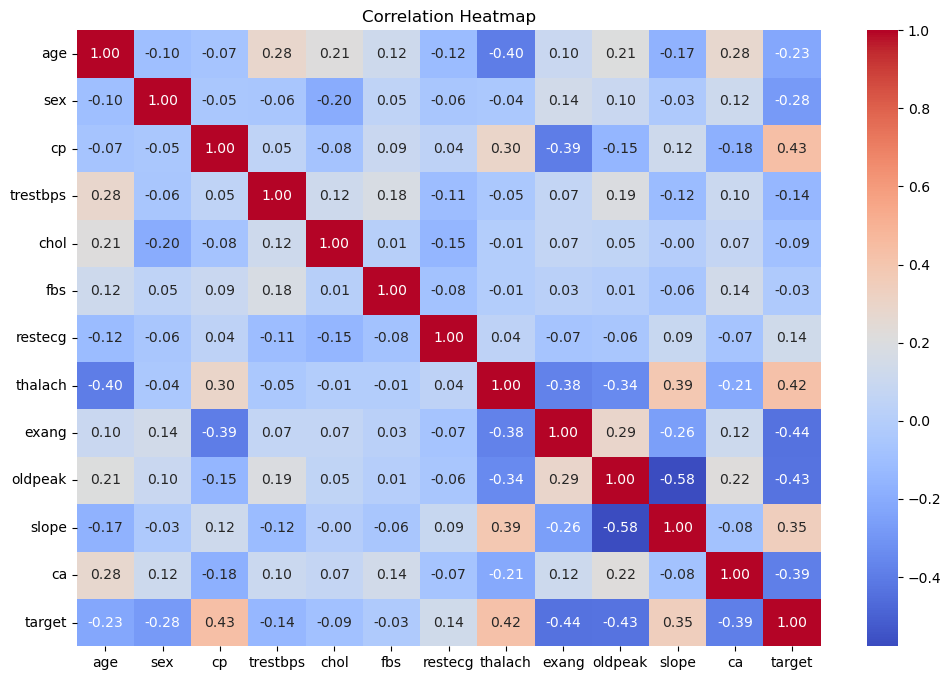

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Importing all usefull lib

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [11]:
x = df.drop(['target'], axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


### 3. Logistic Regression

In [12]:
lr = LogisticRegression()

lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)

matrix_lr = confusion_matrix(y_test, y_pred_lr)

accuracy_lr = accuracy_score(y_test, y_pred_lr)

print(matrix_lr)

print("Accuracy Score:", accuracy_lr)

[[36  5]
 [ 9 41]]
Accuracy Score: 0.8461538461538461


### 4. Decision Tree

In [13]:
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred_dt = dt.predict(x_test)

matrix_dt = confusion_matrix(y_test, y_pred_dt)

accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(matrix_dt)

print("Accuracy Score:", accuracy_dt)

[[31 10]
 [11 39]]
Accuracy Score: 0.7692307692307693


In [14]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [21]:
from sklearn.tree import export_graphviz
import graphviz

In [20]:
dot_data = export_graphviz(dt, feature_names=x.columns, class_names=['No Disease', 'Disease'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph.view()

'decision_tree.pdf'

### 5. Random Forest

In [22]:
rf = RandomForestClassifier()

rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

matrix_rf = confusion_matrix(y_test, y_pred_rf)

accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(matrix_rf)

print("Accuracy Score:", accuracy_rf)

[[36  5]
 [ 7 43]]
Accuracy Score: 0.8681318681318682


In [26]:
estimator = rf.estimators_[0]
dot_data = export_graphviz(estimator, feature_names=x.columns, class_names=['No Disease', 'Disease'])
graph = graphviz.Source(dot_data)
graph.render('Random Forest')
graph.view() 

'Random Forest.pdf'

### 6. Select the best model

a. Print the confusion matrix of all classifiers

In [30]:
print('Confusion matrix of Linear Regression')
print(matrix_lr, '\n')

print('Confusion matrix of Decision Tree')
print(matrix_dt, '\n')

print('Confusion matrix of Random Forest')
print(matrix_rf)


Confusion matrix of Linear Regression
[[36  5]
 [ 9 41]] 

Confusion matrix of Decision Tree
[[31 10]
 [11 39]] 

Confusion matrix of Random Forest
[[36  5]
 [ 7 43]]


b. Print the classification report of all classifiers

In [36]:
print('Classification report of Linear Regression : ','\n',classification_report(y_test, y_pred_lr))

print('Classification report of Decision Tree : ','\n',classification_report(y_test, y_pred_dt))

print('Classification report of Random Forest : ',classification_report(y_test, y_pred_rf))

Classification report of Linear Regression :  
               precision    recall  f1-score   support

           0       0.80      0.88      0.84        41
           1       0.89      0.82      0.85        50

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91

Classification report of Decision Tree :  
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        41
           1       0.80      0.78      0.79        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Classification report of Random Forest :                precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.90      0.86      0.88        50

    accuracy                           0.87     

c. Calculate Recall Precision and F1 score of all the models

In [45]:
print('For Logistic Regression')
recall_lr = matrix_lr[1, 1] / (matrix_lr[1, 1] + matrix_lr[1, 0])
precision_lr = matrix_lr[1, 1] / (matrix_lr[1, 1] + matrix_lr[0, 1])
f1_score_lr = 2 * (precision_lr * recall_lr) / (precision_lr + recall_lr)

print('Recall is :',recall_lr)
print('Precision is :',precision_lr)
print('F1 Score is :',f1_score_lr)
print('\n')


print('For Random Forest')
recall_rf = matrix_rf[1, 1] / (matrix_rf[1, 1] + matrix_rf[1, 0])
precision_rf = matrix_rf[1, 1] / (matrix_rf[1, 1] + matrix_rf[0, 1])
f1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

print('Recall is :',recall_rf)
print('Precision is :',precision_rf)
print('F1 Score is :',f1_score_rf)
print('\n')

print('For Decision Tree')

recall_dt = matrix_dt[1, 1] / (matrix_dt[1, 1] + matrix_dt[1, 0])
precision_dt = matrix_dt[1, 1] / (matrix_dt[1, 1] + matrix_dt[0, 1])
f1_score_dt = 2 * (precision_dt * recall_dt) / (precision_dt + recall_dt)

print('Recall is :',recall_dt)
print('Precision is :',precision_dt)
print('F1 Score is :',f1_score_dt)

For Logistic Regression
Recall is : 0.82
Precision is : 0.8913043478260869
F1 Score is : 0.8541666666666666


For Random Forest
Recall is : 0.86
Precision is : 0.8958333333333334
F1 Score is : 0.8775510204081632


For Decision Tree
Recall is : 0.78
Precision is : 0.7959183673469388
F1 Score is : 0.7878787878787878


d. Visualize confusion matrix using heatmaps

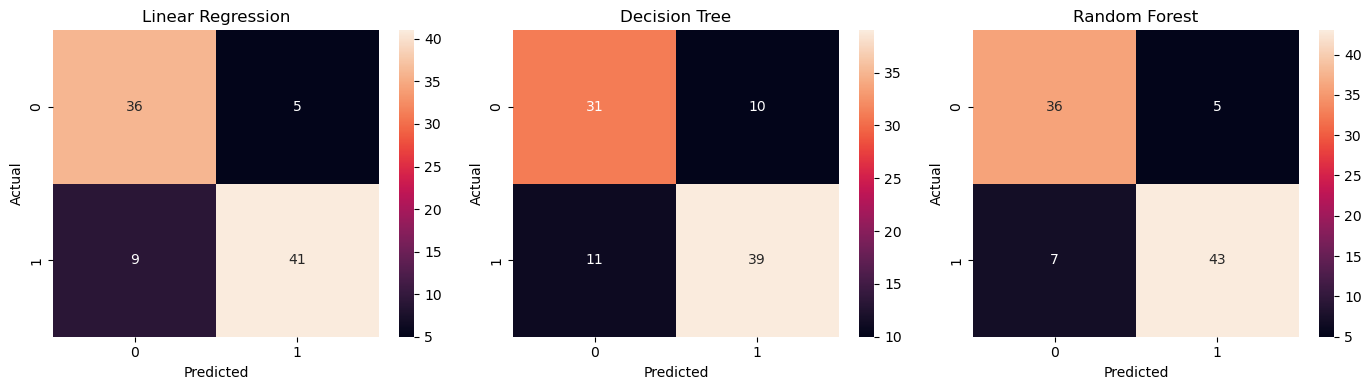

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

sns.heatmap(matrix_lr, annot=True, ax=axes[0])
axes[0].set_title("Linear Regression")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(matrix_dt, annot=True, ax=axes[1])
axes[1].set_title("Decision Tree")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

sns.heatmap(matrix_rf, annot=True, ax=axes[2])
axes[2].set_title("Random Forest")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")

plt.tight_layout()
plt.show()

e. Select the best model based on the best accuracies

In [54]:
# Random Forest is giving 86% which is above all models we try.